In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
file_path = '/Users/ctychen/Desktop/N3AS/spectrum_data/'
#reloading data
parameters = np.concatenate([np.load(file_path + "atm_retr_params_12800_"+str(i)+".npy") for i in range(12)])
spectra_set = np.concatenate([np.load(file_path + "atm_retr_data_12800_"+str(i)+".npy") for i in range(12)])

parameters = parameters[~np.isnan(spectra_set).any(axis=1)]
spectra_set = spectra_set[~np.isnan(spectra_set).any(axis=1)]

print(parameters.shape)
print(spectra_set.shape)

(153590, 16)
(153590, 947)


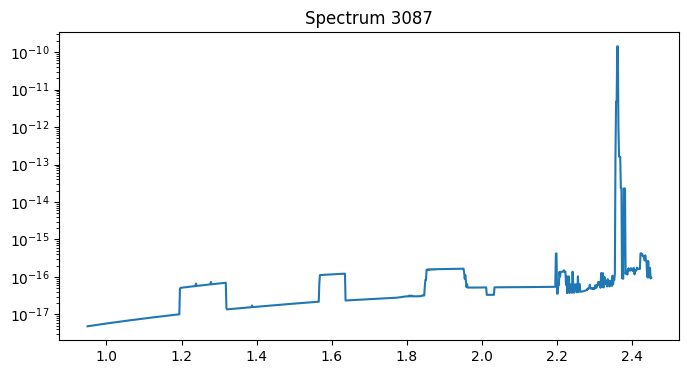

<Figure size 640x480 with 0 Axes>

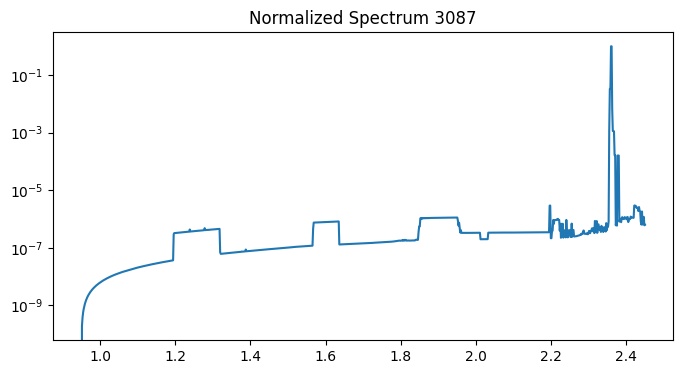

<Figure size 640x480 with 0 Axes>

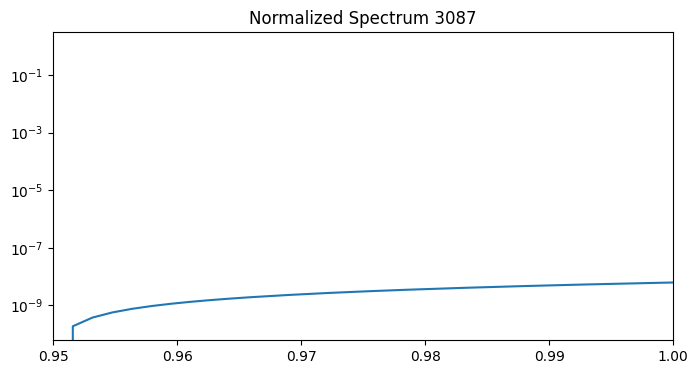

<Figure size 640x480 with 0 Axes>

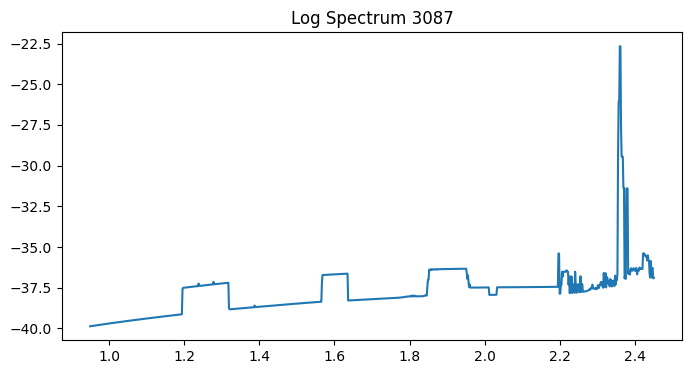

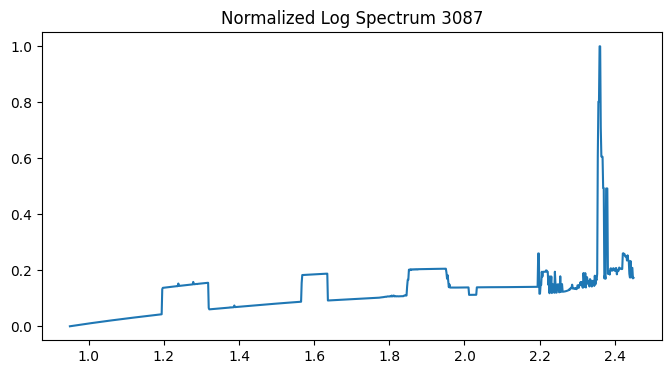

In [35]:
spectrum_3087 = spectra_set[3087]
wavelengths = np.linspace(0.95, 2.45, len(spectrum_3087))

plt.figure(figsize=(8, 4))
plt.plot(wavelengths, spectrum_3087)
plt.title('Spectrum 3087')
plt.yscale('log')
plt.figure()

#compare with normalizing: 
# What if you first (before computing max-abs-diff),
# pre-process the fluxes (or log(fluxes)) by normalizing them 
# so that they are always in the interval [0,1]? 
# For a given spectrum you can just subtract its minimum flux 
# and then divide by the max-min? 
# This should rescale all spectra to the same range
max_flux = np.max(spectrum_3087)
min_flux = np.min(spectrum_3087)
norm_spectrum_3087 = (spectrum_3087 - min_flux)/(max_flux - min_flux)

plt.figure(figsize=(8, 4))
plt.plot(wavelengths, norm_spectrum_3087)
plt.title('Normalized Spectrum 3087')
plt.yscale('log')
plt.figure()

plt.figure(figsize=(8, 4))
plt.plot(wavelengths, norm_spectrum_3087)
plt.title('Normalized Spectrum 3087')
plt.yscale('log')
plt.xlim(0.95, 1.0)
plt.figure()

log_spectrum_3087 = np.log(spectrum_3087)

plt.figure(figsize=(8, 4))
plt.plot(wavelengths, log_spectrum_3087)
plt.title('Log Spectrum 3087')
plt.show()

#try then applying linear normalization to the log spectrum
max_log_flux = np.max(log_spectrum_3087)
min_log_flux = np.min(log_spectrum_3087)
norm_log_spectrum_3087 = (log_spectrum_3087 - min_log_flux)/(max_log_flux - min_log_flux)

plt.figure(figsize=(8, 4))
plt.plot(wavelengths, norm_log_spectrum_3087)
plt.title('Normalized Log Spectrum 3087')
plt.show()

#so maybe what we should try for normalizing would be: 
#1. take the log of the spectrum
#2. then normalize the log spectrum with linear scaling
#3. norm = (log_spectrum - min(log_spectrum))/(max(log_spectrum) - min(log_spectrum))

#from there we could use the normalized log spectrum for processing


In [38]:
log_spectra_set = np.log(spectra_set)
max_log_flux = np.max(log_spectra_set, axis=1)
min_log_flux = np.min(log_spectra_set, axis=1)
norm_log_spectra_set = (log_spectra_set - min_log_flux[:, np.newaxis])/(max_log_flux - min_log_flux)[:, np.newaxis]

print(norm_log_spectra_set.shape)

(153590, 947)


In [40]:
#now find the max absolute difference between adjacent points is, for the normalized log spectra
max_absolute_differences = np.max(np.abs(np.diff(norm_log_spectra_set, axis=1)), axis=1)    
print(max_absolute_differences.shape)

(153590,)


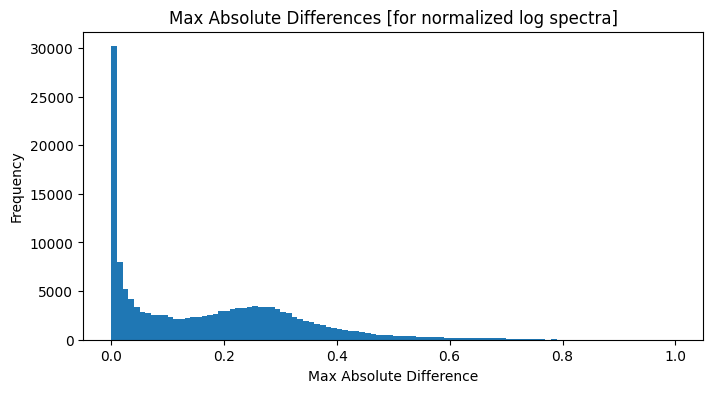

In [42]:
#what does the distribution of max absolute differences look like?
plt.figure(figsize=(8, 4))
plt.hist(max_absolute_differences, bins=100)
plt.title('Max Absolute Differences [for normalized log spectra]')
plt.xlabel('Max Absolute Difference')
plt.ylabel('Frequency')
plt.show()

[149497  13323 149911  26413  79335  72684 140866 150574  46856 110332
  81226  70736  29913 139177   5113  17246 117791  27550  71947  15376]


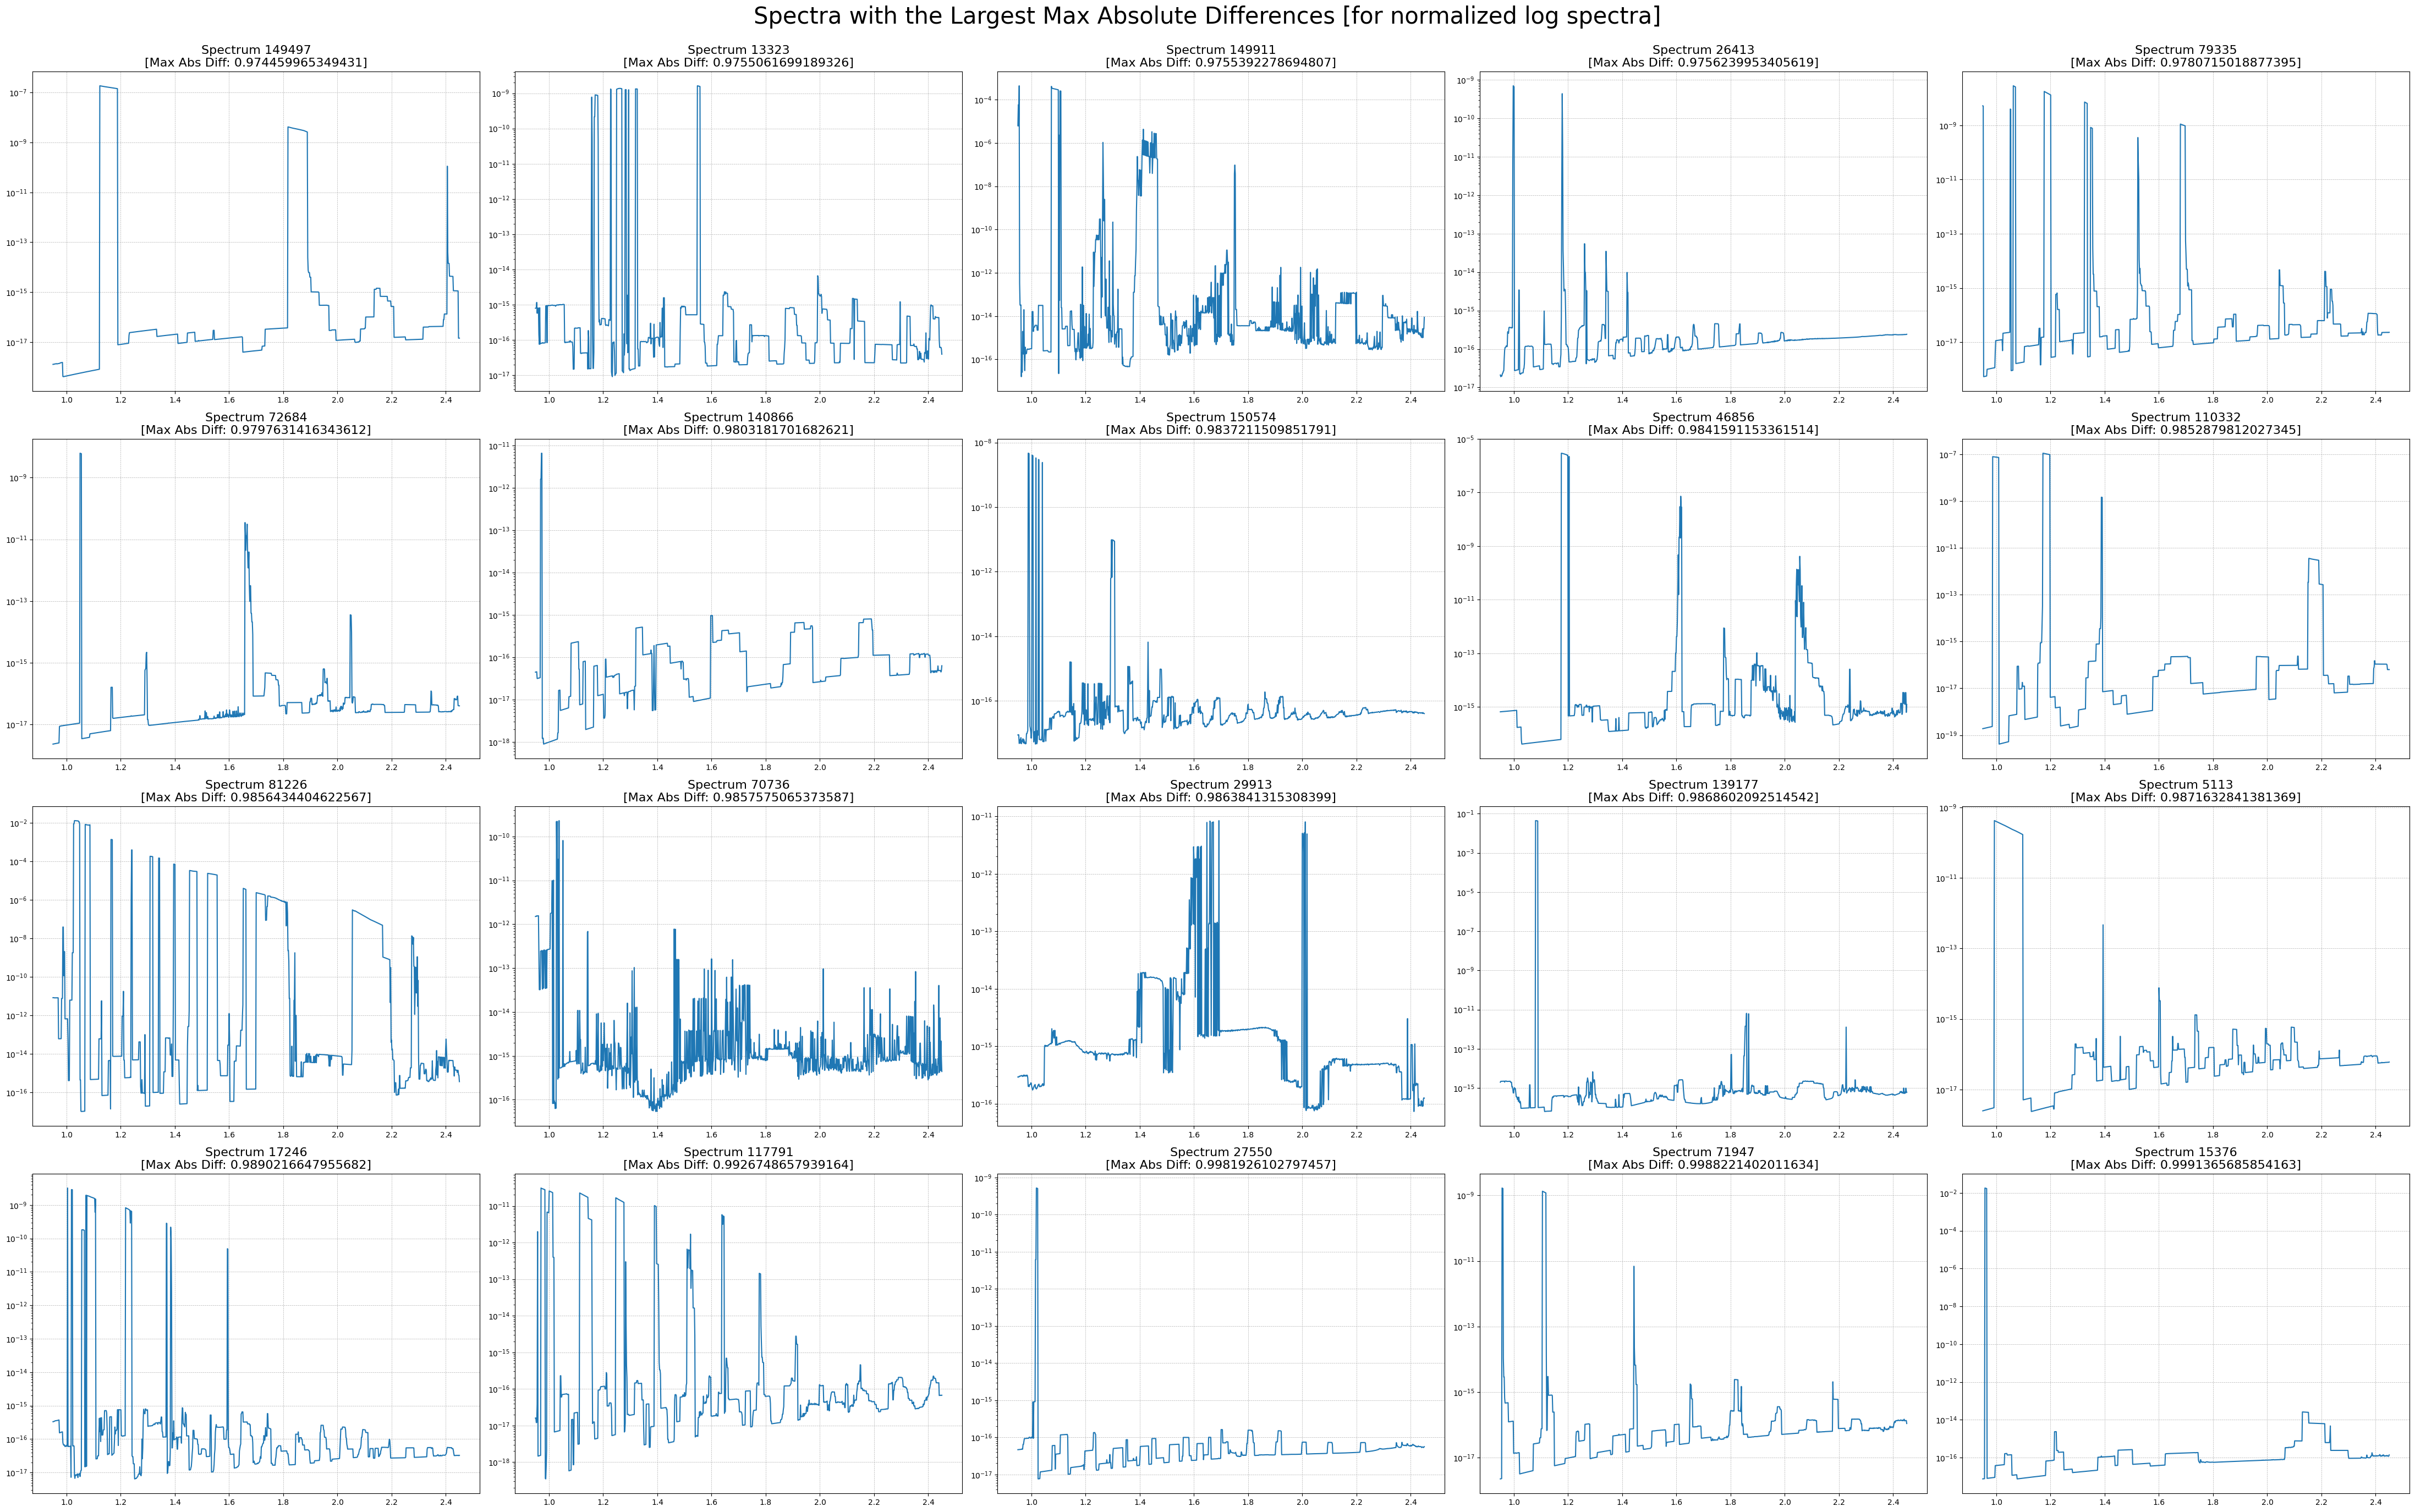

In [49]:
#what do the spectra with the largest max absolute differences look like?
max_diff_indices = np.argsort(max_absolute_differences)[-20:]
print(max_diff_indices)

indices = max_diff_indices[-20:]

fig, axs = plt.subplots(4, 5, figsize=(44, 28))
axs = axs.flatten()
fig.suptitle('Spectra with the Largest Max Absolute Differences [for normalized log spectra]', fontsize=30)
for i, index in enumerate(indices):
    spectrum = spectra_set[index]
    axs[i].plot(wavelengths, spectrum)
    axs[i].set_title('Spectrum ' + str(index) + '\n[Max Abs Diff: ' + str(max_absolute_differences[index]) + ']', fontsize=16)
    axs[i].set_yscale('log')
    axs[i].grid(linestyle='--', linewidth=0.5)  
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

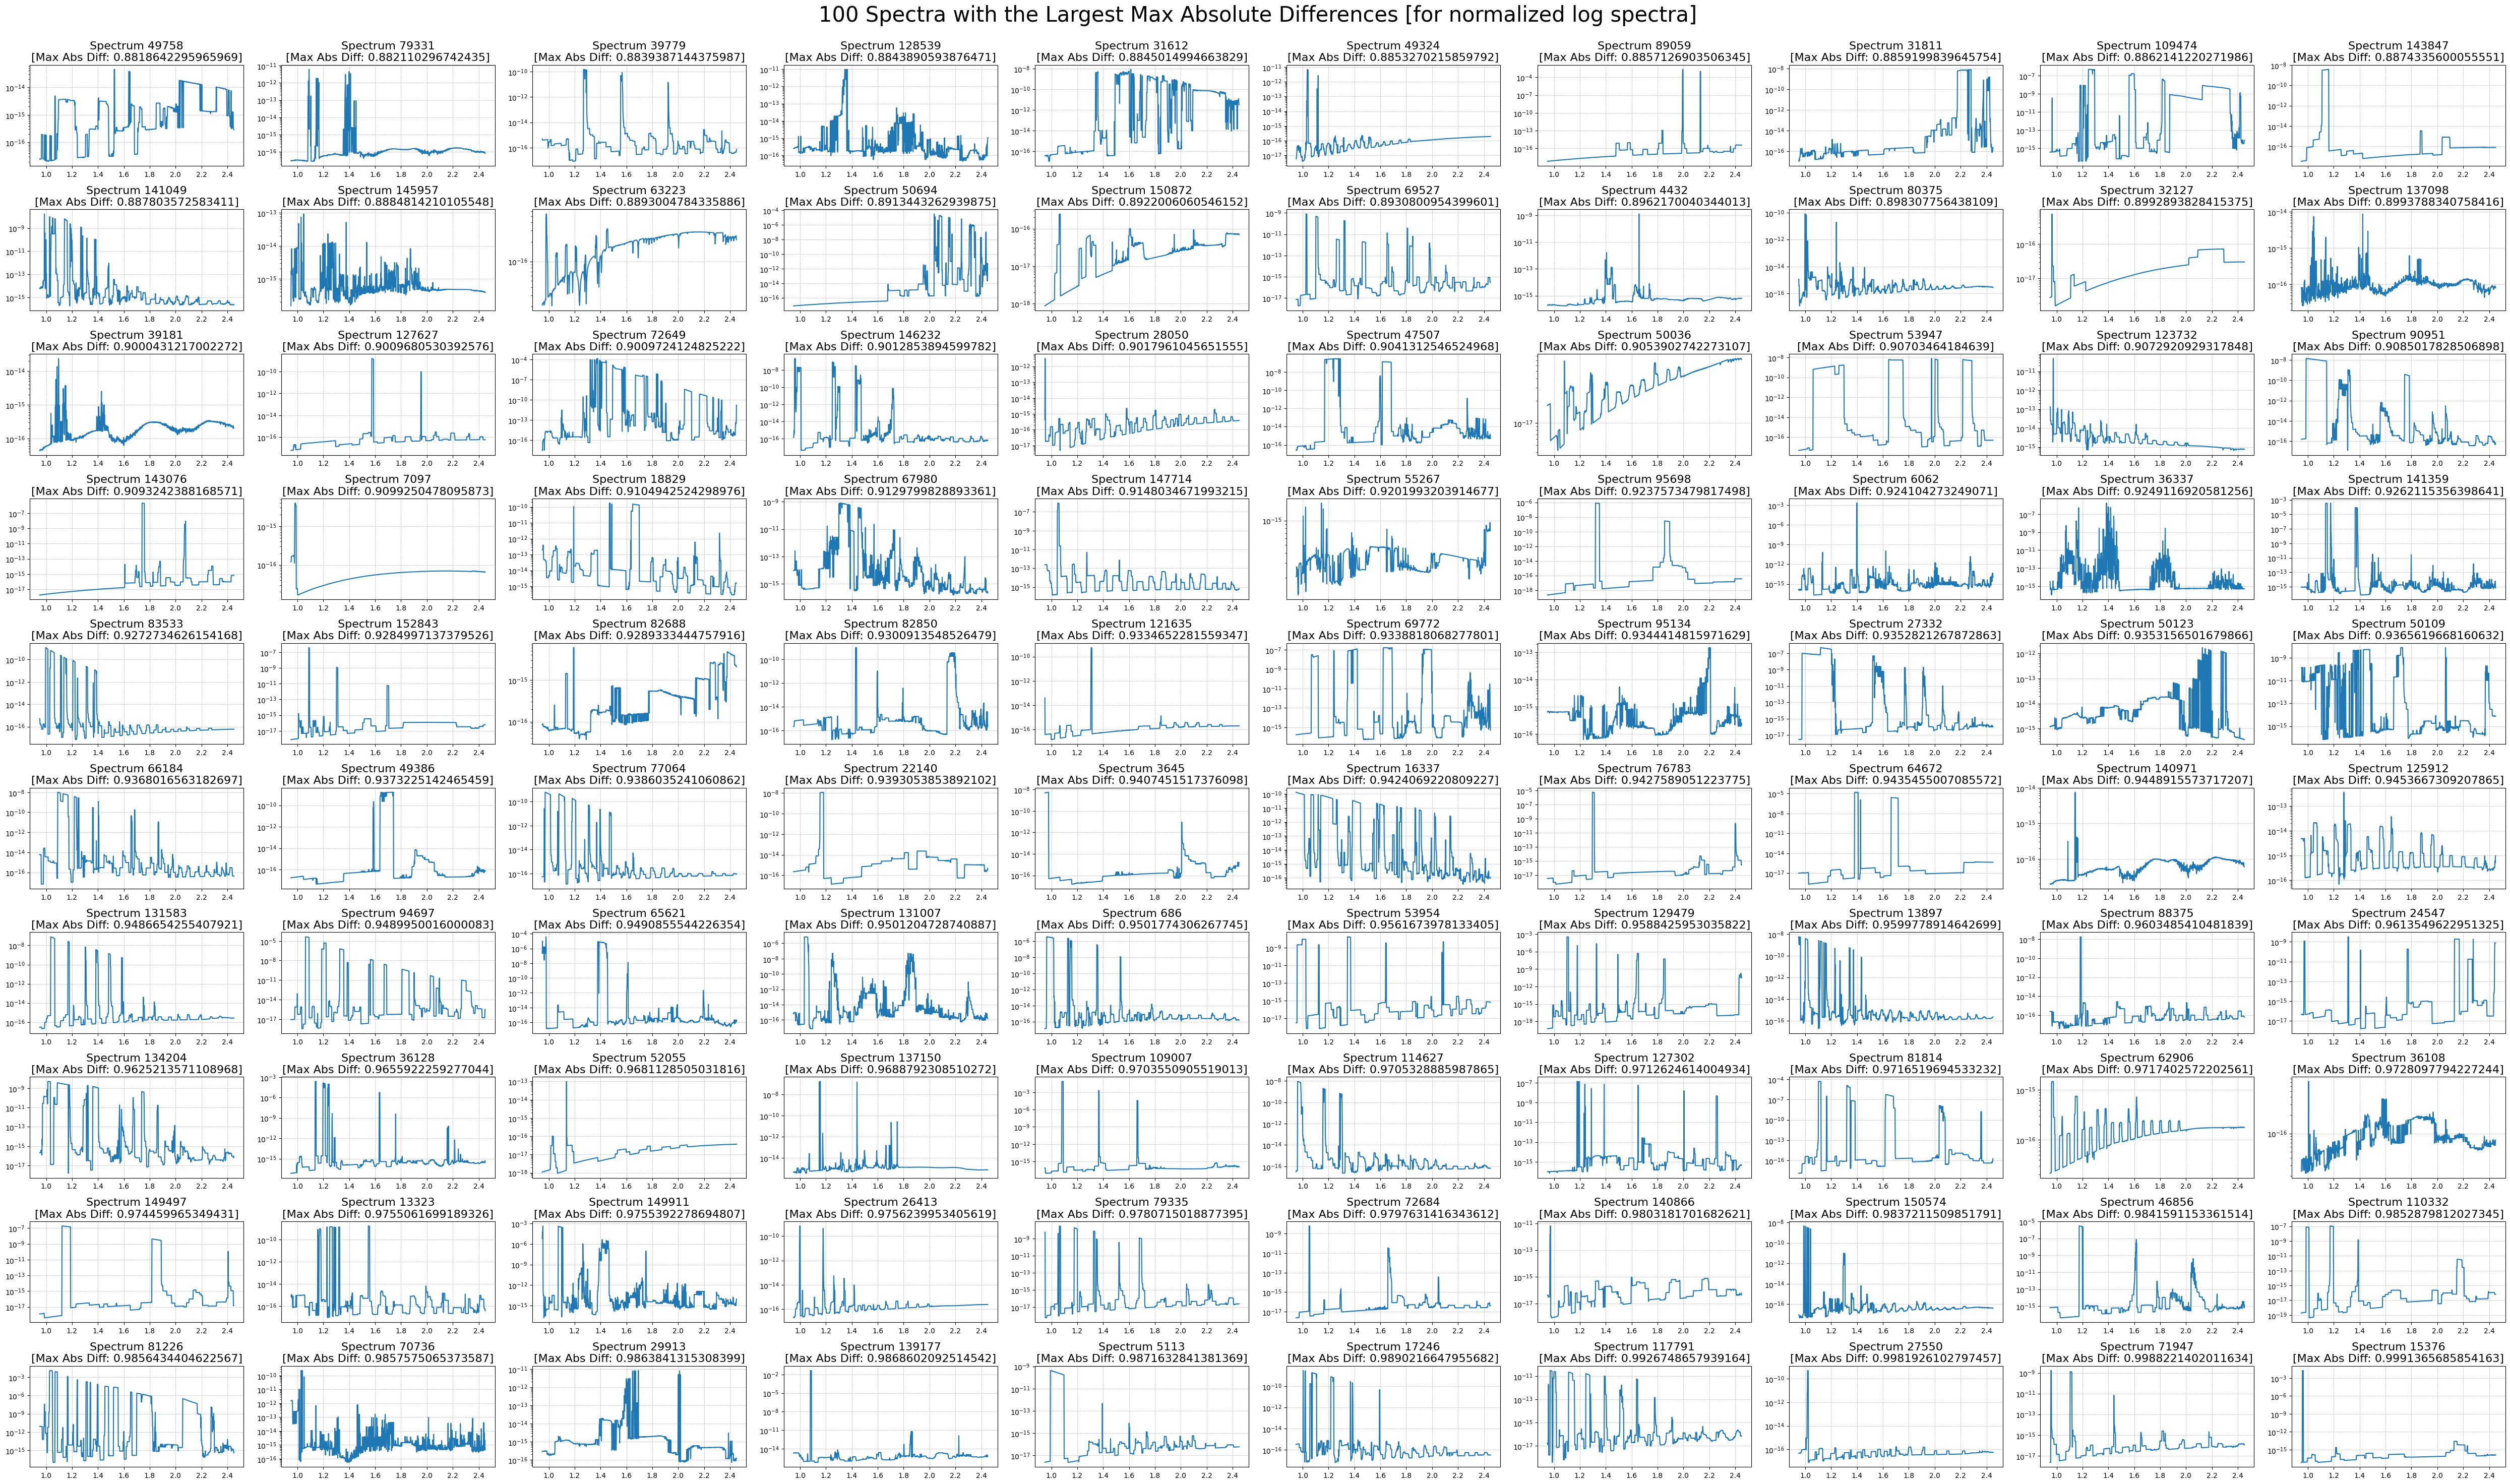

In [50]:
#what about the 100 spectra with the largest max absolute differences?
max_diff_indices = np.argsort(max_absolute_differences)[-100:]
indices = max_diff_indices[-100:]

fig, axs = plt.subplots(10, 10, figsize=(50, 30))
axs = axs.flatten()
fig.suptitle('100 Spectra with the Largest Max Absolute Differences [for normalized log spectra]', fontsize=30)
for i, index in enumerate(indices):
    spectrum = spectra_set[index]
    axs[i].plot(wavelengths, spectrum)
    axs[i].set_title('Spectrum ' + str(index) + '\n[Max Abs Diff: ' + str(max_absolute_differences[index]) + ']', fontsize=16)
    axs[i].set_yscale('log')
    axs[i].grid(linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
